In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
#from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Importing the dataset:

In [21]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


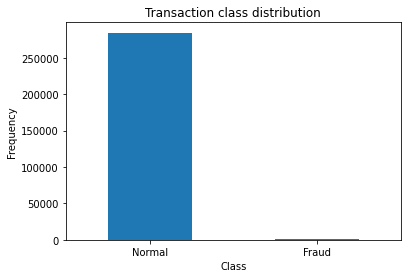

In [5]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

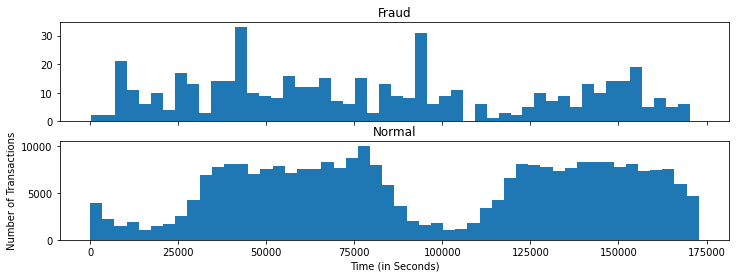

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

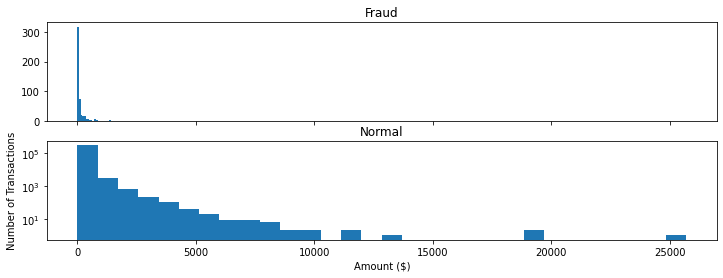

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

## Data Preprocessing:
 

*   With the use of standard scaler, amount is transformed and stored as scaled_amount.
*   Later dataset is split into 75% for training and 25% for testing





In [22]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
# scaled_time = scaler.fit_transform(df[['Time']])
# flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
# scaled_time = pd.Series(flat_list1)

In [23]:
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [24]:
df = pd.concat([df, scaled_amount.rename('scaled_amount')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
50206,44391.0,0.900419,-0.137333,0.141412,1.164863,-0.248875,-0.526028,0.403063,-0.086181,-0.033502,...,-1.440228,0.131138,-0.013645,0.098188,-0.838710,-0.005799,0.050806,156.98,0,0.274390
59462,48854.0,-0.341052,0.155849,1.363049,-1.174103,-0.023614,0.831432,-0.312863,0.199546,-1.602145,...,1.301142,-0.402702,-1.078346,0.100501,0.168082,0.016331,0.082974,15.00,0,-0.293258
221405,142557.0,-0.024779,0.733619,0.330073,-0.664549,0.347575,-0.871582,0.870887,-0.024196,-0.197168,...,-0.504856,0.094107,0.049103,-0.554407,0.117400,0.236027,0.087255,8.98,0,-0.317327
181132,124840.0,-1.311733,1.151872,-0.195866,-2.455948,0.147616,-0.800418,0.394304,0.817758,-0.293720,...,-0.583853,-0.044577,0.769113,-0.028902,0.391517,-0.414591,-0.034389,4.00,0,-0.337237
267505,162800.0,2.017329,-1.411838,-2.274452,-1.852184,1.445699,3.524082,-1.275816,0.852391,-0.231354,...,0.537065,0.131483,0.734205,-0.105459,-0.148248,-0.000628,-0.045469,90.00,0,0.006598


In [25]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [26]:
X = df.iloc[:, df.columns!='Class']
y = df.iloc[:, df.columns == 'Class']

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

## Balancing the data using SMOTE:


In [27]:
from imblearn.over_sampling import SMOTE

In [29]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.25)
X_train = np.array(X_resample)
X_test = np.array(X_test)
y_train = np.array(y_resample)
y_test = np.array(y_test)

## Training the Machine learning model:


> We tested the data over many classification algorithms and Random Forest Classifier provided the best results.



In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10) 
clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71340
           1       1.00      1.00      1.00     70818

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [45]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

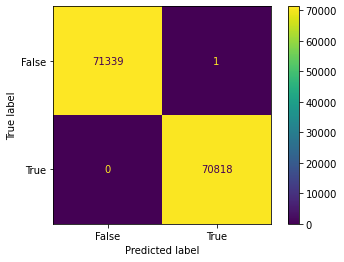

In [46]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Training the Neural Network:

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential([
    Dense(units=18, input_dim = 29,activation='relu'),
    Dense(units=26,activation='relu'),
    Dropout(0.5),
    Dense(22,activation='relu'),
    Dense(22,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
56863/56863 [==============================] - 91s 2ms/step - loss: 0.0330 - accuracy: 0.9890
Epoch 2/10
56863/56863 [==============================] - 97s 2ms/step - loss: 0.0132 - accuracy: 0.9965
Epoch 3/10
56863/56863 [==============================] - 93s 2ms/step - loss: 0.0104 - accuracy: 0.9973
Epoch 4/10
56863/56863 [==============================] - 88s 2ms/step - loss: 0.0093 - accuracy: 0.9978
Epoch 5/10
56863/56863 [==============================] - 88s 2ms/step - loss: 0.0082 - accuracy: 0.9981
Epoch 6/10
56863/56863 [==============================] - 87s 2ms/step - loss: 0.0078 - accuracy: 0.9983
Epoch 7/10
56863/56863 [==============================] - 94s 2ms/step - loss: 0.0079 - accuracy: 0.9984
Epoch 8/10
56863/56863 [==============================] - 90s 2ms/step - loss: 0.0070 - accuracy: 0.9984
Epoch 9/10
56863/56863 [==============================] - 88s 2ms/step - loss: 0.0070 - accuracy: 0.9985
Epoch 10/10
56863/56863 [==============================

In [37]:
score = model.evaluate(X_test, y_test)
print(score)

4443/4443 [==============================] - 5s 1ms/step - loss: 0.0049 - accuracy: 0.9989
[0.004892320372164249, 0.9989237189292908]


In [38]:
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred.round())

4443/4443 [==============================] - 4s 908us/step


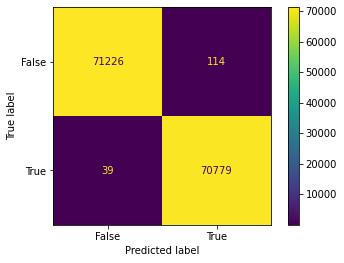

In [42]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()